In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt
import autoviz
from autoviz.AutoViz_Class import AutoViz_Class

ImportError: cannot import name 'issparse' from 'scipy.sparse' (unknown location)

In [ ]:
df = pd.read_csv('heart.csv', sep=',')

In [ ]:
AV = AutoViz_Class()
df = AV.AutoViz("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

NameError: name 'AutoViz_Class' is not defined

Renaming columns to something readable

In [86]:
df.columns = ["Age", "Sex", "Chst_Pain_Typ", "Resting_Blood_Pres", "Chlstrl", "Fsting_Bld_Sgr", "Resting_ECG", "Max_Hrt_Rt", "Exrcs_Indcd_Angina", "Old_Peak", "Slope_Of_Peak_Exrcs", "Num_mjr_vessels", "Thalassemia", "Output"]

Check for wrong type and NULL:

In [87]:
# Check column types
df.dtypes

Age                      int64
Sex                      int64
Chst_Pain_Typ            int64
Resting_Blood_Pres       int64
Chlstrl                  int64
Fsting_Bld_Sgr           int64
Resting_ECG              int64
Max_Hrt_Rt               int64
Exrcs_Indcd_Angina       int64
Old_Peak               float64
Slope_Of_Peak_Exrcs      int64
Num_mjr_vessels          int64
Thalassemia              int64
Output                   int64
dtype: object

In [88]:
# Check for nulls
df.isnull().sum()

Age                    0
Sex                    0
Chst_Pain_Typ          0
Resting_Blood_Pres     0
Chlstrl                0
Fsting_Bld_Sgr         0
Resting_ECG            0
Max_Hrt_Rt             0
Exrcs_Indcd_Angina     0
Old_Peak               0
Slope_Of_Peak_Exrcs    0
Num_mjr_vessels        0
Thalassemia            0
Output                 0
dtype: int64

Data before pre-processing

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Chst_Pain_Typ'}>,
        <AxesSubplot:title={'center':'Resting_Blood_Pres'}>,
        <AxesSubplot:title={'center':'Chlstrl'}>],
       [<AxesSubplot:title={'center':'Fsting_Bld_Sgr'}>,
        <AxesSubplot:title={'center':'Resting_ECG'}>,
        <AxesSubplot:title={'center':'Max_Hrt_Rt'}>,
        <AxesSubplot:title={'center':'Exrcs_Indcd_Angina'}>,
        <AxesSubplot:title={'center':'Old_Peak'}>],
       [<AxesSubplot:title={'center':'Slope_Of_Peak_Exrcs'}>,
        <AxesSubplot:title={'center':'Num_mjr_vessels'}>,
        <AxesSubplot:title={'center':'Thalassemia'}>,
        <AxesSubplot:title={'center':'Output'}>, <AxesSubplot:>]],
      dtype=object)

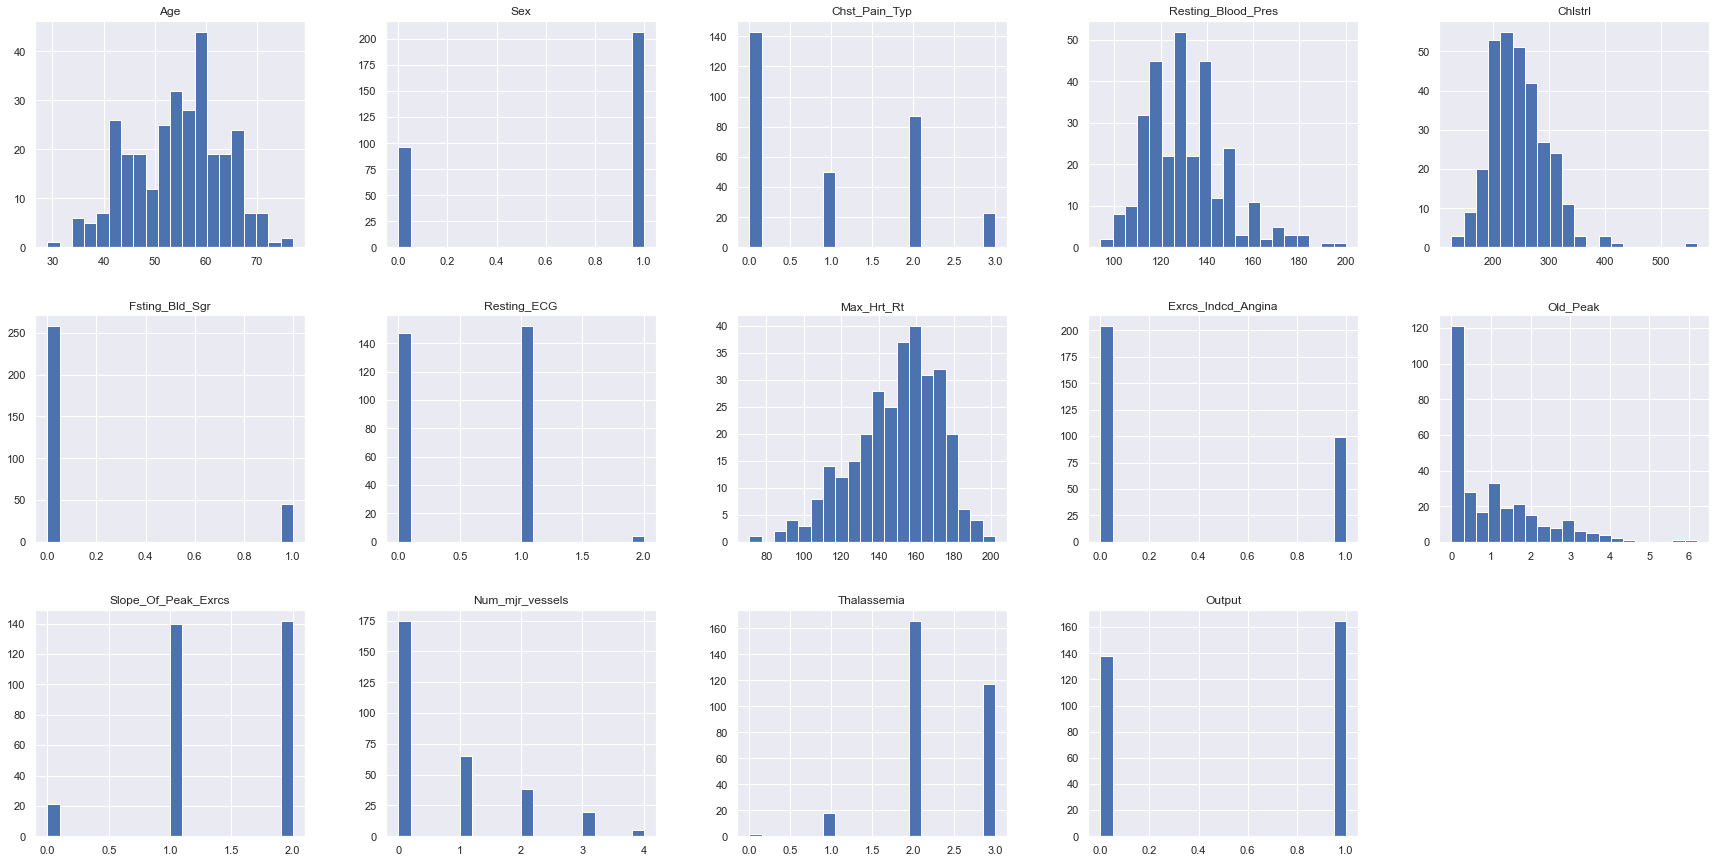

In [89]:
df.hist(figsize=(30,15), bins = 20, layout=(3,5))

Check for bad data:

In [90]:
# check for zeros
df[df == 0].count() 

Age                      0
Sex                     96
Chst_Pain_Typ          143
Resting_Blood_Pres       0
Chlstrl                  0
Fsting_Bld_Sgr         258
Resting_ECG            147
Max_Hrt_Rt               0
Exrcs_Indcd_Angina     204
Old_Peak                99
Slope_Of_Peak_Exrcs     21
Num_mjr_vessels        175
Thalassemia              2
Output                 138
dtype: int64

In [91]:
# check for negatives
df[df<0].count()

Age                    0
Sex                    0
Chst_Pain_Typ          0
Resting_Blood_Pres     0
Chlstrl                0
Fsting_Bld_Sgr         0
Resting_ECG            0
Max_Hrt_Rt             0
Exrcs_Indcd_Angina     0
Old_Peak               0
Slope_Of_Peak_Exrcs    0
Num_mjr_vessels        0
Thalassemia            0
Output                 0
dtype: int64

In [92]:
# Check for duplicated rows:
len(df[df.duplicated()])

1

In [93]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)

Impute missing values:

In [94]:
# no missing data for this dataset

In [95]:
Y = df.loc[:, df.columns == 'Output']
X = df.loc[:, df.columns != 'Output']

Data distribution

In [96]:
# check skew of data
X.skew()

Age                   -0.203743
Sex                   -0.786120
Chst_Pain_Typ          0.493022
Resting_Blood_Pres     0.716541
Chlstrl                1.147332
Fsting_Bld_Sgr         1.981201
Resting_ECG            0.169467
Max_Hrt_Rt            -0.532671
Exrcs_Indcd_Angina     0.737281
Old_Peak               1.266173
Slope_Of_Peak_Exrcs   -0.503247
Num_mjr_vessels        1.295738
Thalassemia           -0.481232
dtype: float64

In [97]:
X.kurtosis()

Age                   -0.527512
Sex                   -1.391273
Chst_Pain_Typ         -1.183729
Resting_Blood_Pres     0.922996
Chlstrl                4.542591
Fsting_Bld_Sgr         1.937947
Resting_ECG           -1.359464
Max_Hrt_Rt            -0.062186
Exrcs_Indcd_Angina    -1.466170
Old_Peak               1.567876
Slope_Of_Peak_Exrcs   -0.629935
Num_mjr_vessels        0.781003
Thalassemia            0.295855
dtype: float64

Standardizing data

In [98]:
columns = X.columns
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.columns = columns

Checking for outliers:

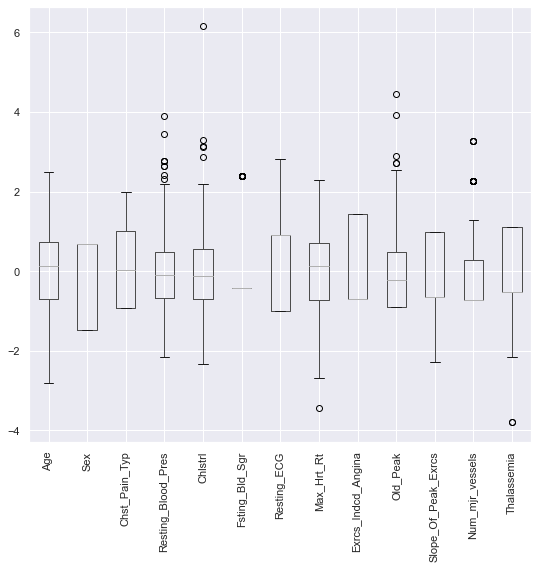

In [99]:
boxplot = X.boxplot() 
plt.xticks(rotation=90);

Winsorizing outliers

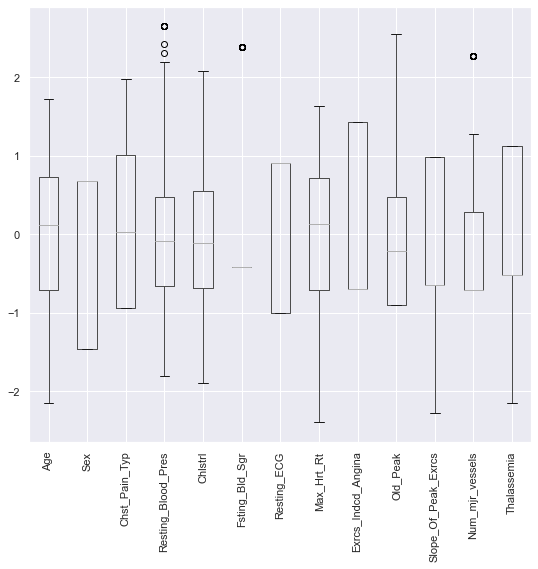

In [100]:
def winsorize_series(X):
    return winsorize(X, limits=[0.01,0.02])

X_win = X.apply(winsorize_series, axis=0)
boxplot = X_win.boxplot() 
plt.xticks(rotation=90);


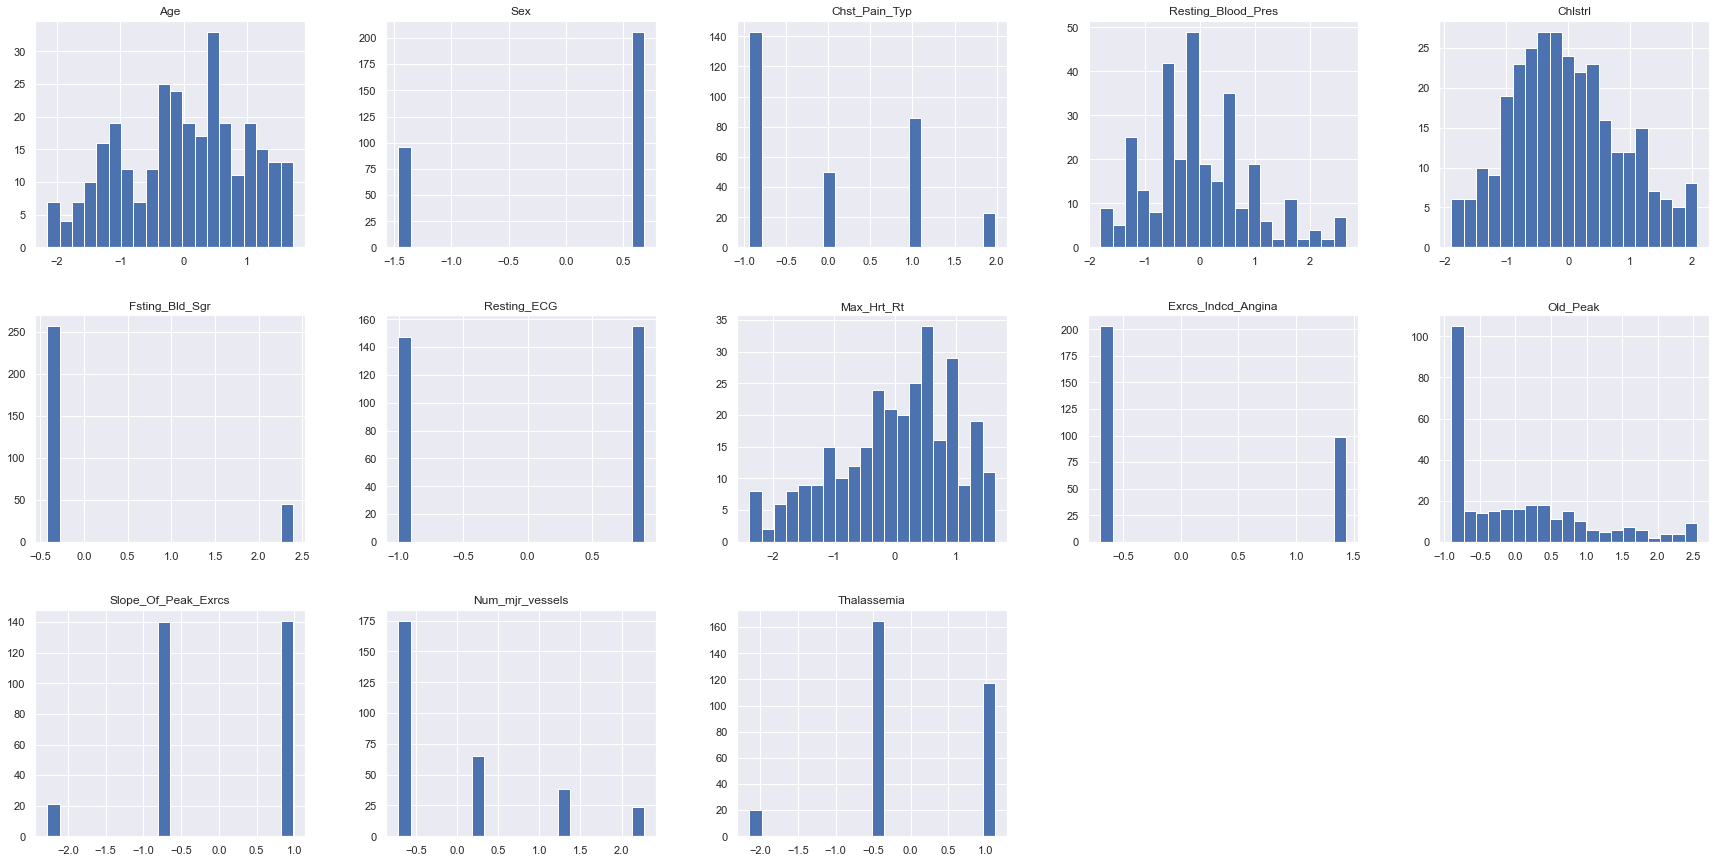

In [101]:
X_win.hist(figsize=(30,15), bins = 20, layout=(3,5));

Text(0.5, 1.0, 'Violin plot of features')

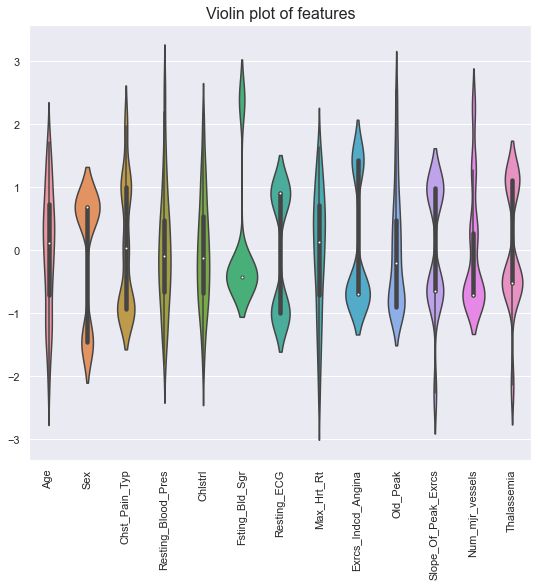

In [102]:
plt.rcParams['font.size'] = 14

f = sns.violinplot(data=X_win)

f.set_xticklabels(f.get_xticklabels(),
                  rotation=90)

plt.title("Violin plot of features",
          size=16)

Check for data imbalance

In [103]:
print(Y.value_counts())

Output
1         164
0         138
dtype: int64


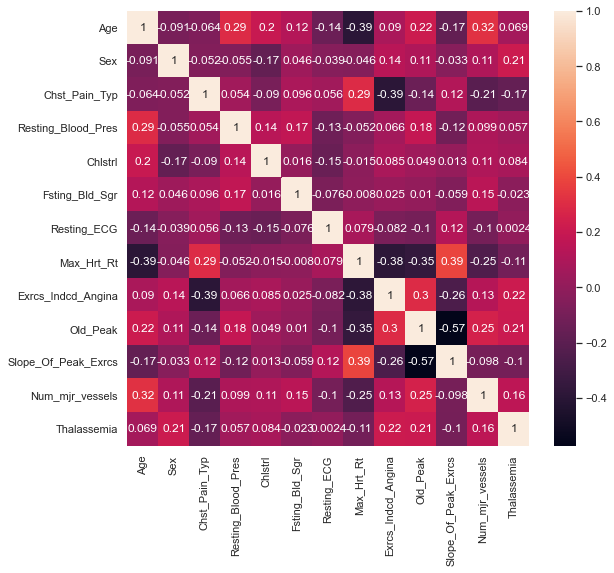

In [104]:
corr_matrix = X_win.corr()
sns.set (rc = {'figure.figsize':(9, 8)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

PCA

In [177]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=9) # estimate only 2 PCs
# X_new = pca.fit_transform(X_win)

# plt.style.use('ggplot')
# colors = {1:'tab:blue', 0:'tab:orange'}
# fig, axes = plt.subplots(1,1)
# axes.scatter(X_new[:,0], X_new[:,1], c=Y['Output'].map(colors))
# axes.set_xlabel('PC1')
# axes.set_ylabel('PC2')
# axes.set_title('After PCA')
# plt.show()

Model Training and testing

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_win, Y, test_size=0.20, random_state=42)

In [194]:
from sklearn.linear_model import LogisticRegression#, CatBoost, GaussianNB, RandomForestClassifier, MLPClassifier
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(X_train, y_train)))

score on test: 0.8360655737704918
score on train: 0.8713692946058091


c:\Anaconda38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [205]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(X_train, y_train)))

score on test: 0.819672131147541
score on train: 0.995850622406639


c:\Anaconda38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [196]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.819672131147541


c:\Anaconda38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
